In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

Load The csv data

In [ ]:
app_data = pd.read_csv("application_data.csv")

Check the Total Columns and Row

In [ ]:
app_data.shape

(307511, 122)


Check The first Five Rows

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


Check the information about our data

In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Check the Null Value in the data

In [ ]:
app_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [ ]:
# Select only numeric columns for correlation calculation
numerical_data = app_data.select_dtypes(include='number')

# Compute correlations
correlation_matrix = numerical_data.corr()
print(correlation_matrix)

                            SK_ID_CURR    TARGET  CNT_CHILDREN  \
SK_ID_CURR                    1.000000 -0.002108     -0.001129   
TARGET                       -0.002108  1.000000      0.019187   
CNT_CHILDREN                 -0.001129  0.019187      1.000000   
AMT_INCOME_TOTAL             -0.001820 -0.003982      0.012882   
AMT_CREDIT                   -0.000343 -0.030369      0.002145   
...                                ...       ...           ...   
AMT_REQ_CREDIT_BUREAU_DAY    -0.002193  0.002704     -0.000366   
AMT_REQ_CREDIT_BUREAU_WEEK    0.002099  0.000788     -0.002436   
AMT_REQ_CREDIT_BUREAU_MON     0.000485 -0.012462     -0.010808   
AMT_REQ_CREDIT_BUREAU_QRT     0.001025 -0.002022     -0.007836   
AMT_REQ_CREDIT_BUREAU_YEAR    0.004659  0.019930     -0.041550   

                            AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
SK_ID_CURR                         -0.001820   -0.000343    -0.000433   
TARGET                             -0.003982   -0.030369    -

**Find the Null Value in the percentage**

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None) #TO DISPLAY ALL COLUMNS
(app_data.isnull().sum()/len(app_data.index))*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


Drop the Data where 50% Null value present in column

In [ ]:
columnsToDelete = ["OWN_CAR_AGE", "EXT_SOURCE_1", "APARTMENTS_AVG", "BASEMENTAREA_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG", "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG", "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG", "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BUILD_MODE", "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMIN_MODE", "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE", "WALLSMATERIAL_MODE"]

In [ ]:
app_data.drop(columnsToDelete, axis = 1, inplace = True)

In [ ]:
app_data.shape

(307511, 81)

In [ ]:
#VERIFYING THAT ALL COLUMNS WITH >50% MISSING VALUES ARE REMOVED
(app_data.isnull().sum()/len(app_data.index))*100

,0
SK_ID_CURR,0.000000
TARGET,0.000000
NAME_CONTRACT_TYPE,0.000000
CODE_GENDER,0.000000
FLAG_OWN_CAR,0.000000
FLAG_OWN_REALTY,0.000000
CNT_CHILDREN,0.000000
AMT_INCOME_TOTAL,0.000000
AMT_CREDIT,0.000000
AMT_ANNUITY,0.003902


In [ ]:
# Imputing remaining missing values (median for numerical columns, mode for categorixal columns)

# Why mean for numerical?: Median is less sensitive to outliers compared to the mean.

# Why mode for categorical?: Categorical columns don’t have a "central" value in the numerical sense, so the most frequent value (mode) is a natural choice.

app_data.fillna({col: app_data[col].median() for col in app_data.select_dtypes(include=np.number).columns}, inplace=True)

app_data.fillna({col: app_data[col].mode()[0] for col in app_data.select_dtypes(include='object').columns}, inplace=True)


print(tabulate(app_data.sample(10), headers='keys', tablefmt='grid'))

+--------+--------------+----------+----------------------+---------------+----------------+-------------------+----------------+--------------------+---------------+---------------+-------------------+-------------------+----------------------+-------------------------------+----------------------+---------------------+------------------------------+--------------+-----------------+---------------------+-------------------+--------------+------------------+-------------------+--------------------+--------------+--------------+-----------------------+-------------------+------------------------+-------------------------------+------------------------------+---------------------------+------------------------------+------------------------------+-------------------------------+--------------------------+--------------------------+---------------------------+------------------------+----------------+----------------+-------------------------------+-----------------+----------------------

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.535276,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.535276,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,No,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


**Check the Null Value for "AMT_GOODS_PRICE**

In [ ]:
app_data["AMT_GOODS_PRICE"].isnull().sum()

0

**We'll impute missing values using median as the mean will skew the data**

In [ ]:
app_data["AMT_GOODS_PRICE"].median()

450000.0

**Fill the Null Value with Median Value**

In [ ]:
app_data["AMT_GOODS_PRICE"] = app_data["AMT_GOODS_PRICE"].fillna(app_data["AMT_GOODS_PRICE"].median())

In [ ]:
# Verify the Null value
app_data['AMT_GOODS_PRICE'].isnull().sum()

0

**Same check for NAME_TYPE_SUITE**

In [ ]:
app_data["NAME_TYPE_SUITE"].isnull().sum()

0

In [ ]:
app_data["NAME_TYPE_SUITE"].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,249818
Family,40149
"Spouse, partner",11370
Children,3267
Other_B,1770
Other_A,866
Group of people,271


In [ ]:
app_data["NAME_TYPE_SUITE"] = app_data["NAME_TYPE_SUITE"].fillna("Unaccompanied")

 Same for Column AMT_ANNUITY --> loan Annuity

In [ ]:
app_data[app_data["AMT_ANNUITY"].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [ ]:
#Imputing with median again
app_data["AMT_ANNUITY"].median()

24903.0

In [ ]:
app_data["AMT_ANNUITY"] = app_data["AMT_ANNUITY"].fillna(0)

In [ ]:
app_data.AMT_ANNUITY.isnull().sum()

0

Gender of the client

In [ ]:
app_data["CODE_GENDER"].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


In [ ]:
app_data["CODE_GENDER"].mode()

,CODE_GENDER
0,F


Replace Null Value XNA to F

In [ ]:
app_data["CODE_GENDER"].replace("XNA", "F", inplace = True)

<ipython-input-41-138129e22f87>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_data["CODE_GENDER"].replace("XNA", "F", inplace = True)


Dropping unwanted columns (Columns that won't help in analysis)

In [ ]:
#Columns that we decided will not help in analysis of finding defaulters
app_data.drop([ "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE", "FLAG_PHONE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "FLAG_EMAIL", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", "DAYS_LAST_PHONE_CHANGE","FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3", "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8", "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13", "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17", "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21", "EXT_SOURCE_2", "EXT_SOURCE_3", "YEARS_BEGINEXPLUATATION_AVG", "FLOORSMAX_AVG", "YEARS_BEGINEXPLUATATION_MODE", "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MEDI", "FLOORSMAX_MEDI", "TOTALAREA_MODE", "EMERGENCYSTATE_MODE"], axis=1, inplace = True)

In [ ]:
app_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0


In [ ]:
(app_data.isnull().sum()/len(app_data.index))*100

,0
SK_ID_CURR,0.0
TARGET,0.0
NAME_CONTRACT_TYPE,0.0
CODE_GENDER,0.0
FLAG_OWN_CAR,0.0
FLAG_OWN_REALTY,0.0
CNT_CHILDREN,0.0
AMT_INCOME_TOTAL,0.0
AMT_CREDIT,0.0
AMT_ANNUITY,0.0


In [ ]:
app_data.shape

(307511, 42)

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,CNT_FAM_MEMBERS,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,1.0,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,2.0,MONDAY,11,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,1.0,MONDAY,9,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,2.0,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,1.0,THURSDAY,11,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
app_data.drop(columns=['FLAG_OWN_CAR', 'CNT_CHILDREN', 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                       'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK'], axis=1, inplace = True)


Fill The Occupation

In [ ]:
# Calculate the mode of the OCCUPATION_TYPE column
occupation_mode = app_data['OCCUPATION_TYPE'].mode()[0]
occupation_mode

'Laborers'

In [ ]:
# Fill NaN values with the mode
app_data['OCCUPATION_TYPE'].fillna(occupation_mode, inplace=True)

<ipython-input-49-11c8fe923010>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  app_data['OCCUPATION_TYPE'].fillna(occupation_mode, inplace=True)


In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fill the Application data Columns with their Median Value

In [ ]:
app_data['OBS_60_CNT_SOCIAL_CIRCLE'].median()

0.0

In [ ]:
app_data["OBS_30_CNT_SOCIAL_CIRCLE"] = app_data["OBS_30_CNT_SOCIAL_CIRCLE"].fillna(app_data["OBS_30_CNT_SOCIAL_CIRCLE"].median())

In [ ]:
app_data["DEF_30_CNT_SOCIAL_CIRCLE"] = app_data["DEF_30_CNT_SOCIAL_CIRCLE"].fillna(app_data["DEF_30_CNT_SOCIAL_CIRCLE"].median())

In [ ]:
app_data["OBS_60_CNT_SOCIAL_CIRCLE"] = app_data["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(app_data["OBS_60_CNT_SOCIAL_CIRCLE"].median())

In [ ]:
app_data["DEF_60_CNT_SOCIAL_CIRCLE"] = app_data["DEF_60_CNT_SOCIAL_CIRCLE"].fillna(app_data["DEF_60_CNT_SOCIAL_CIRCLE"].median())

In [ ]:
app_data["AMT_REQ_CREDIT_BUREAU_MON"] = app_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(app_data["AMT_REQ_CREDIT_BUREAU_MON"].median())

In [ ]:
app_data["AMT_REQ_CREDIT_BUREAU_QRT"] = app_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(app_data["AMT_REQ_CREDIT_BUREAU_QRT"].median())

In [ ]:
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"] = app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].median())

In [ ]:
app_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_REALTY,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,0
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,0


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

In [ ]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OCCUPATION_TYPE,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,Y,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,House / apartment,0.018801,-9461,-637,-3648.0,-2120,Laborers,0,0,0,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,House / apartment,0.003541,-16765,-1188,-1186.0,-291,Core staff,0,0,0,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,House / apartment,0.010032,-19046,-225,-4260.0,-2531,Laborers,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,Y,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,Laborers,0,0,0,0,0,0,Business Entity Type 3,2.0,0.0,2.0,0.0,0.0,0.0,1.0
4,100007,0,Cash loans,M,Y,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,Core staff,0,0,0,0,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#app_data.drop(columns=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH'], axis=1, inplace = True)


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

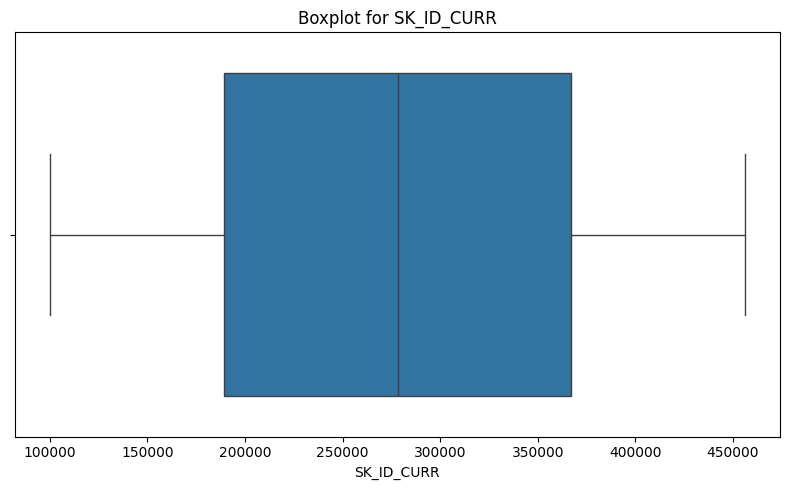

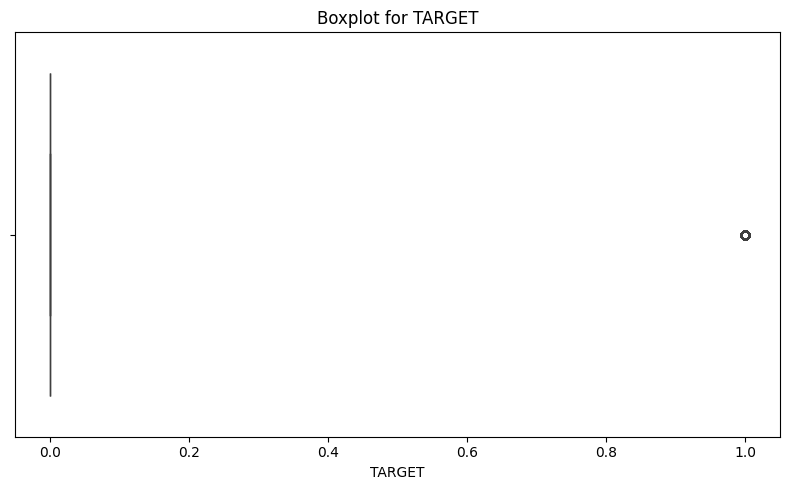

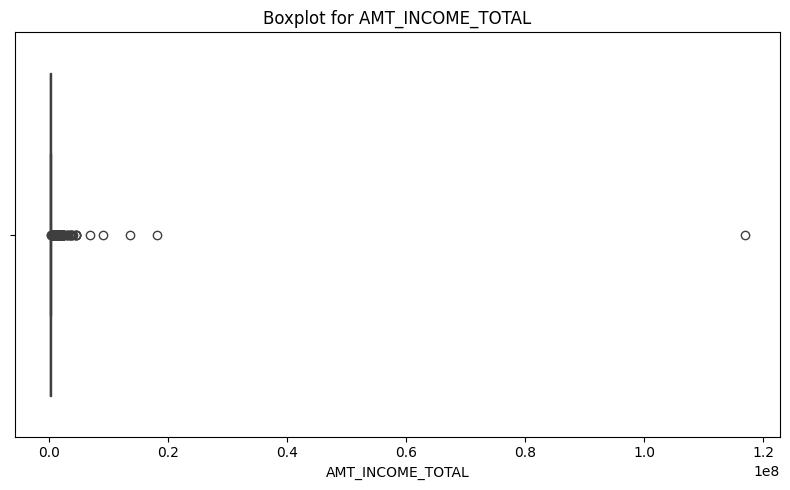

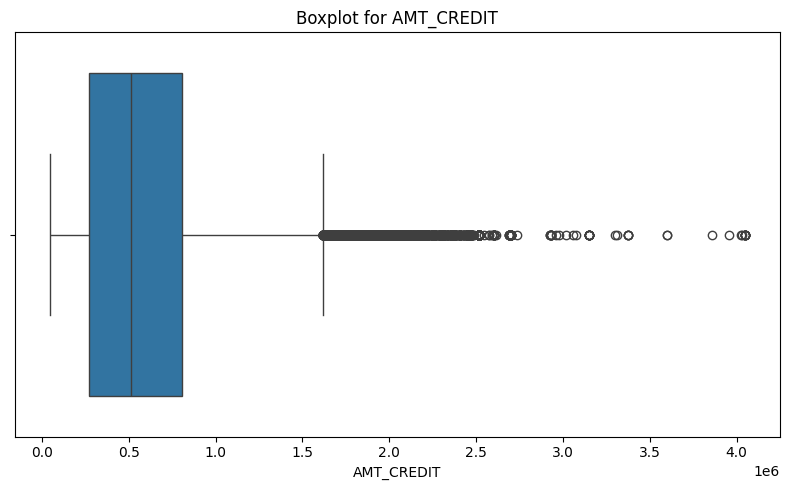

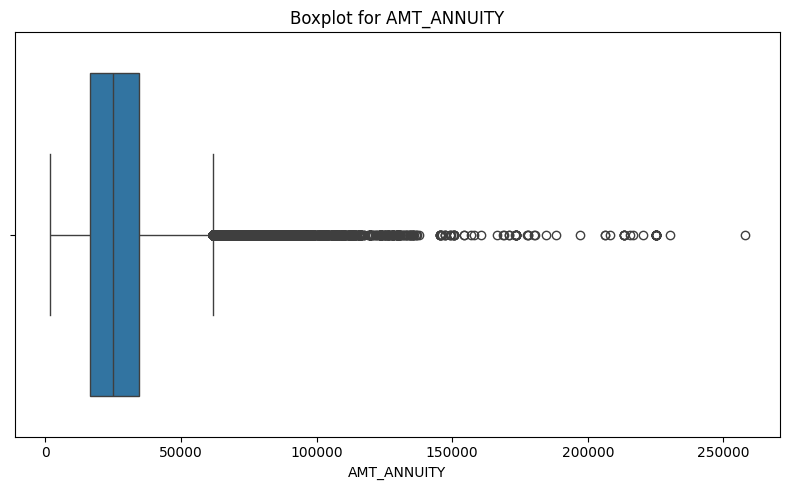

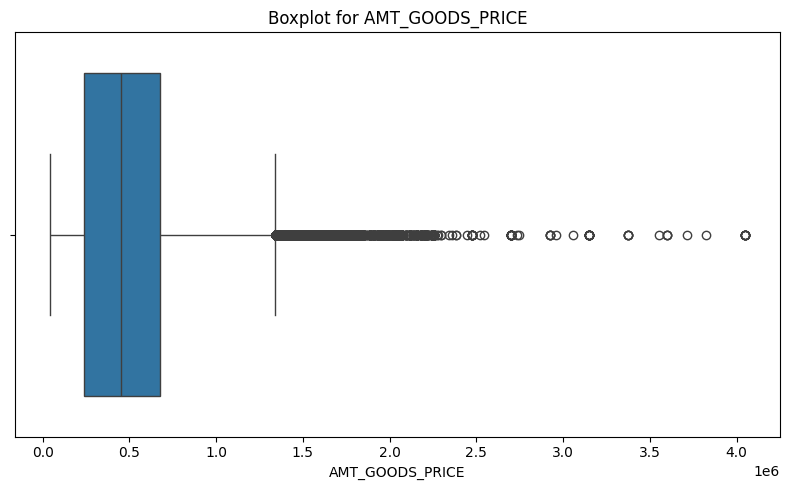

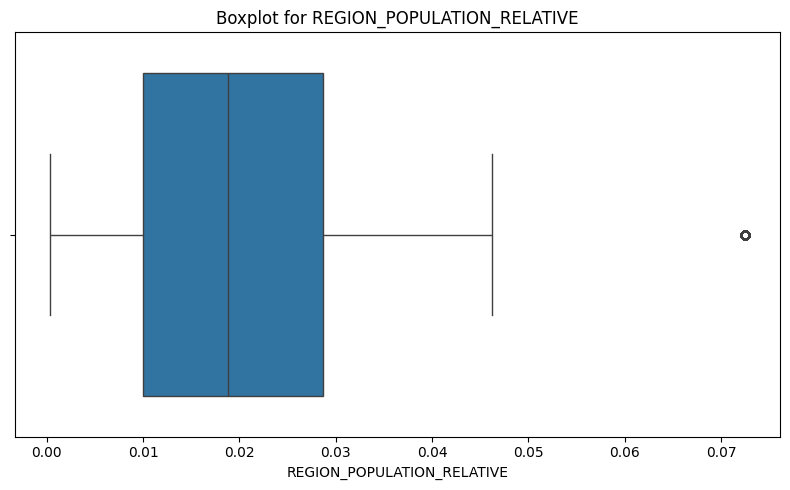

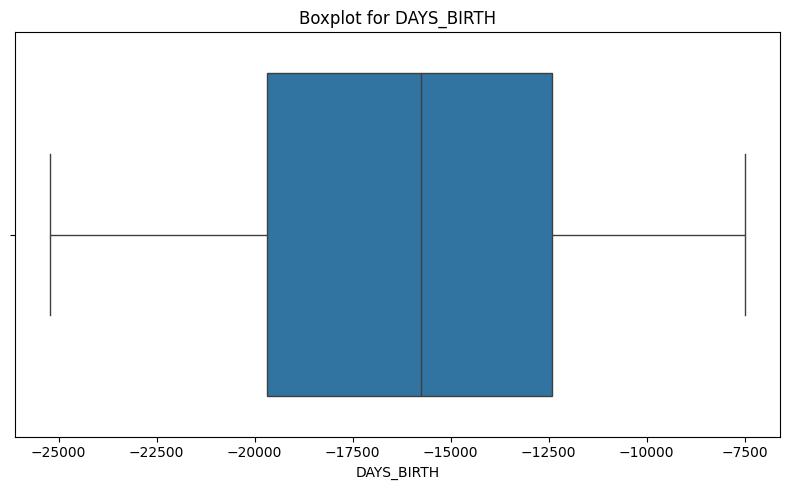

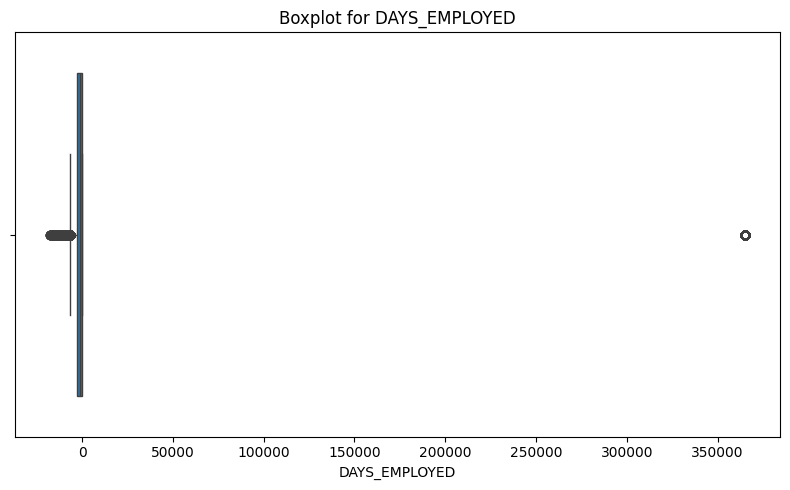

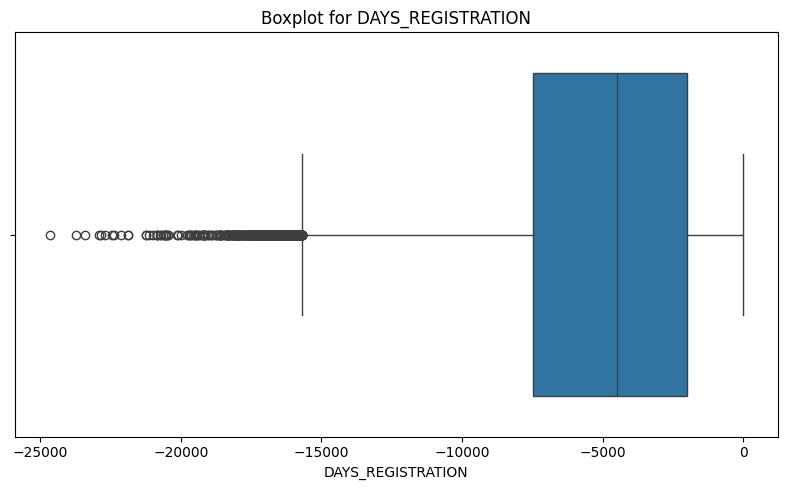

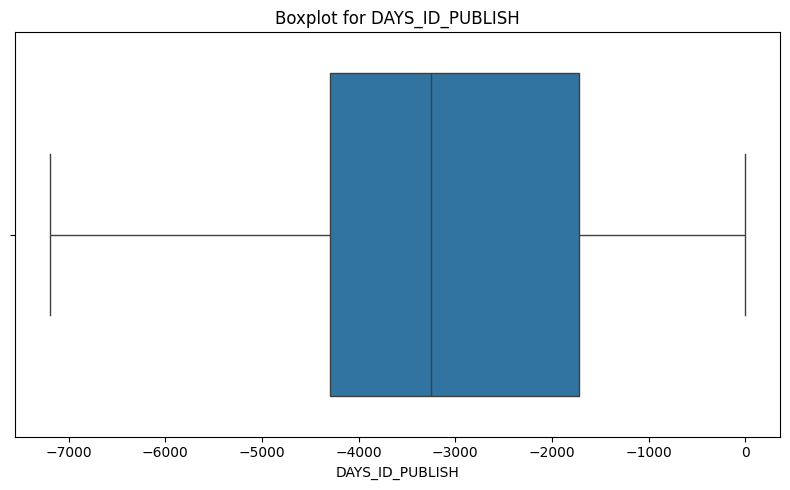

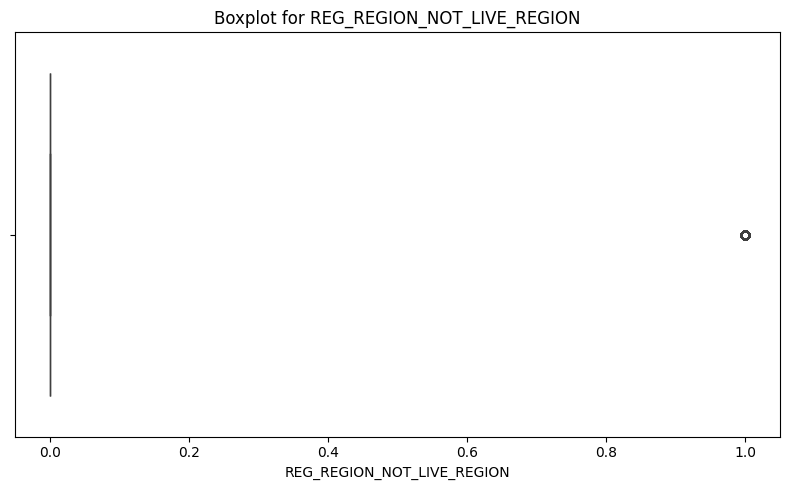

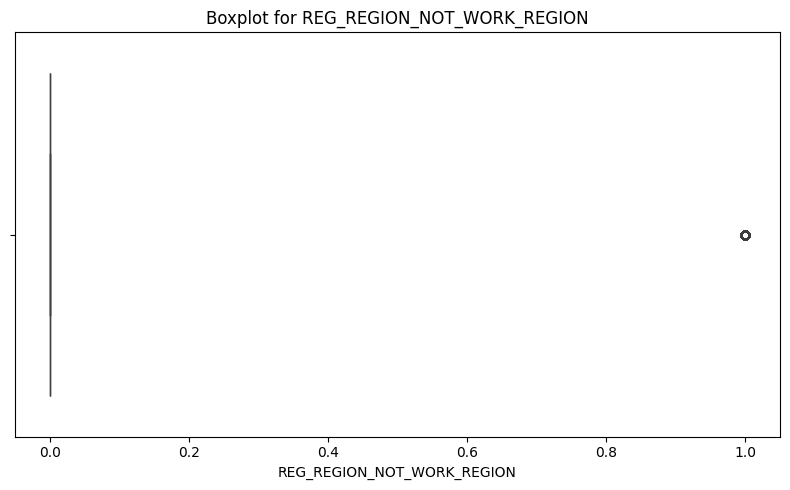

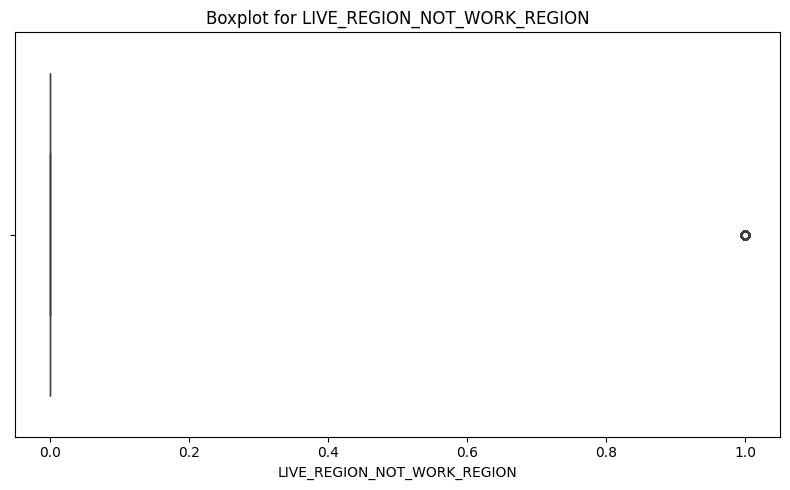

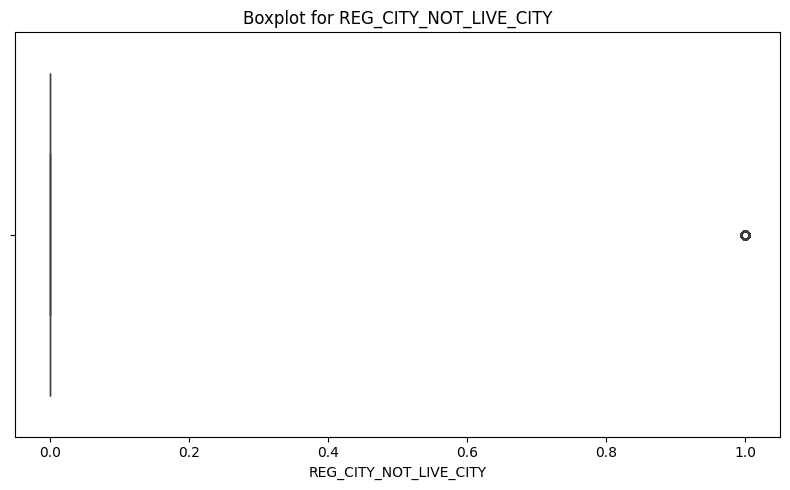

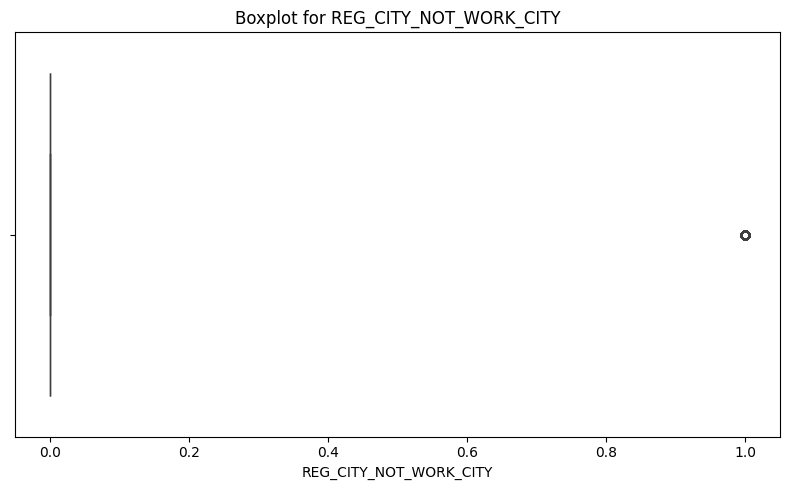

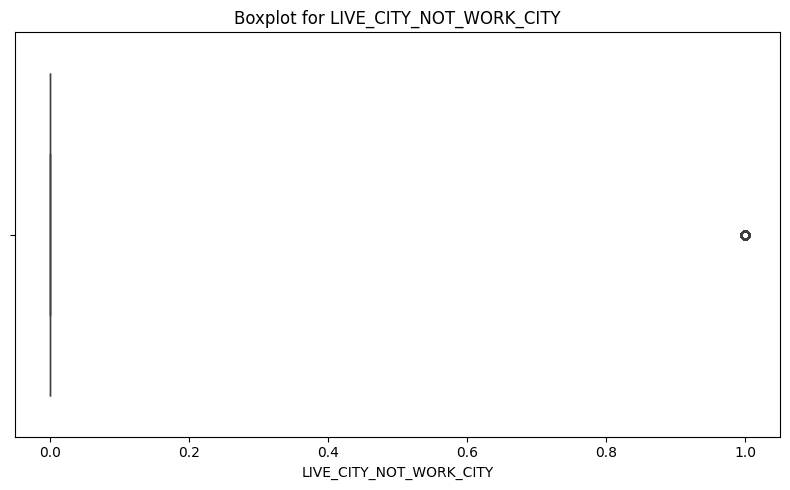

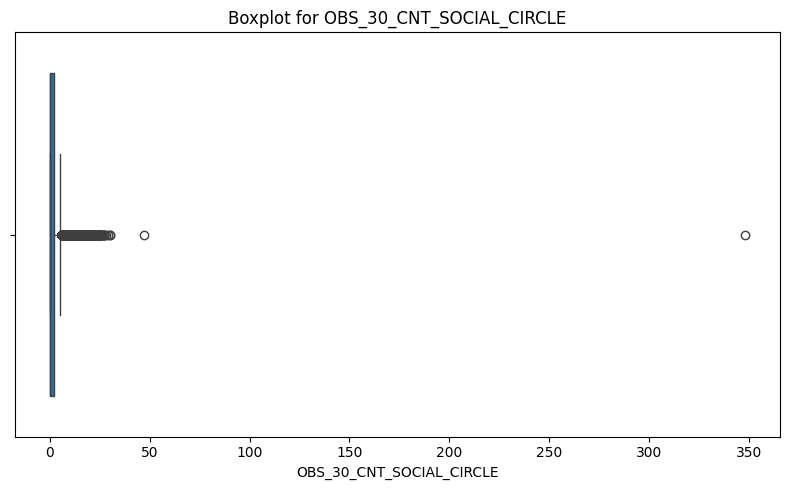

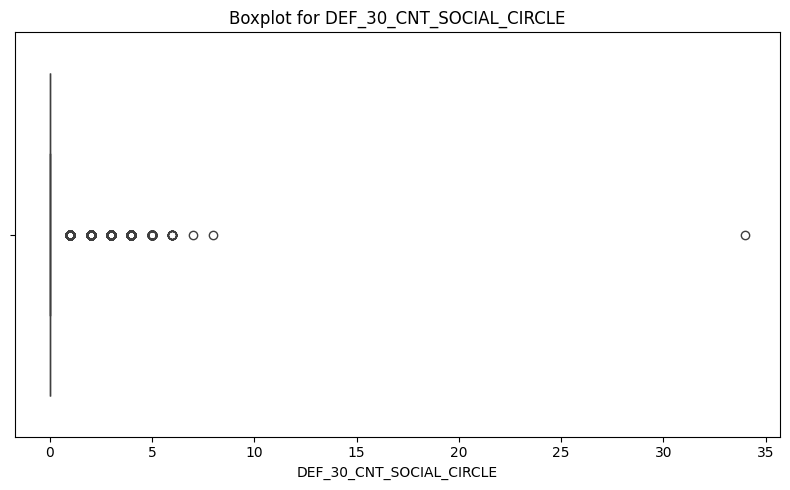

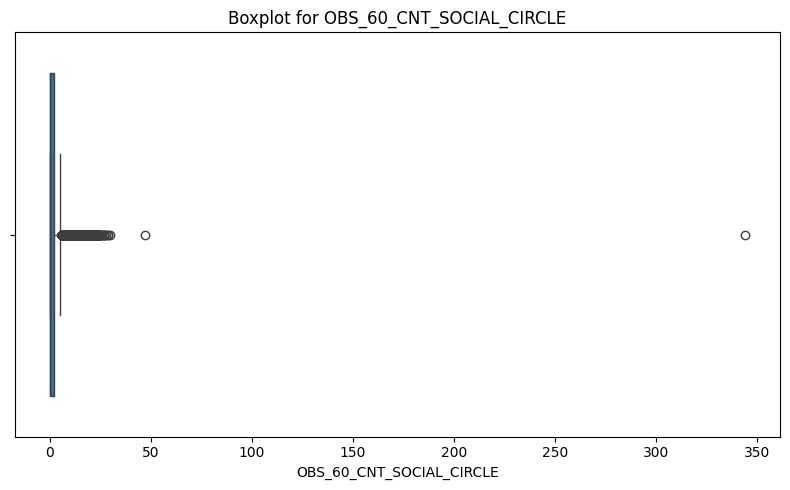

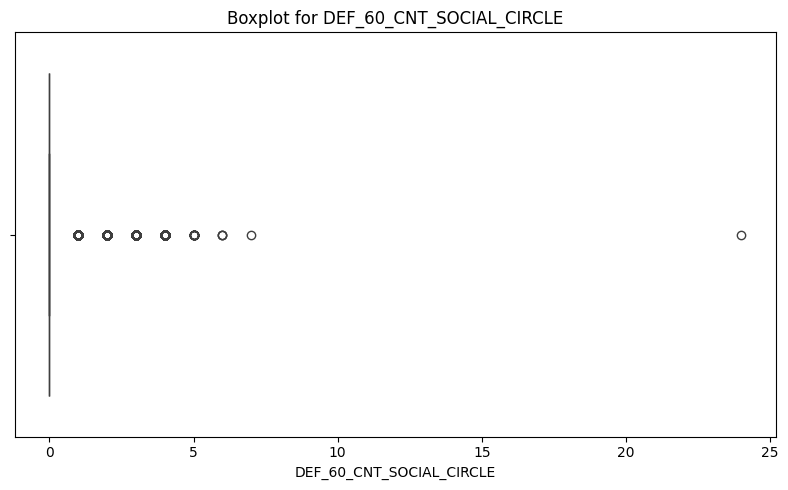

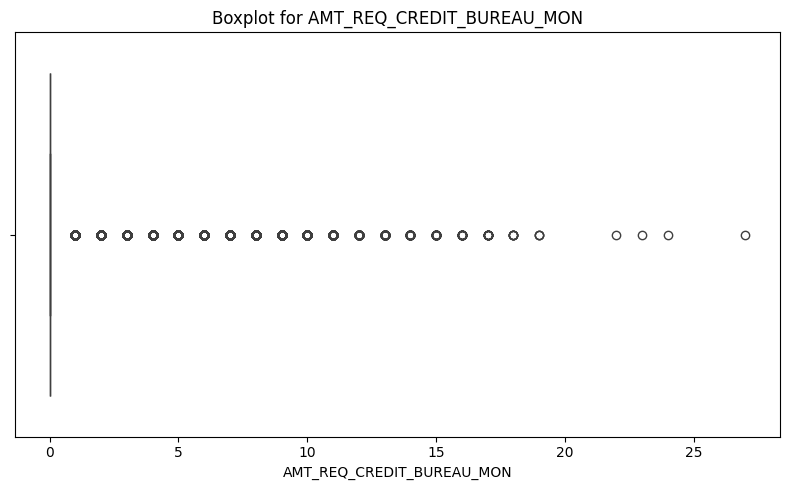

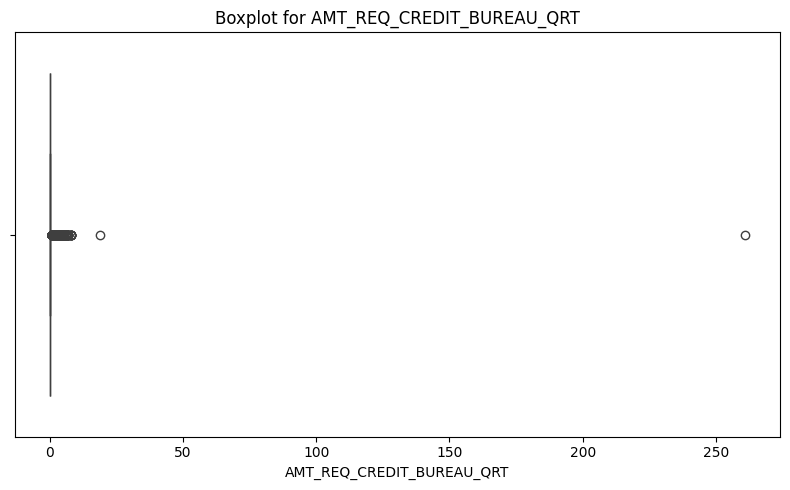

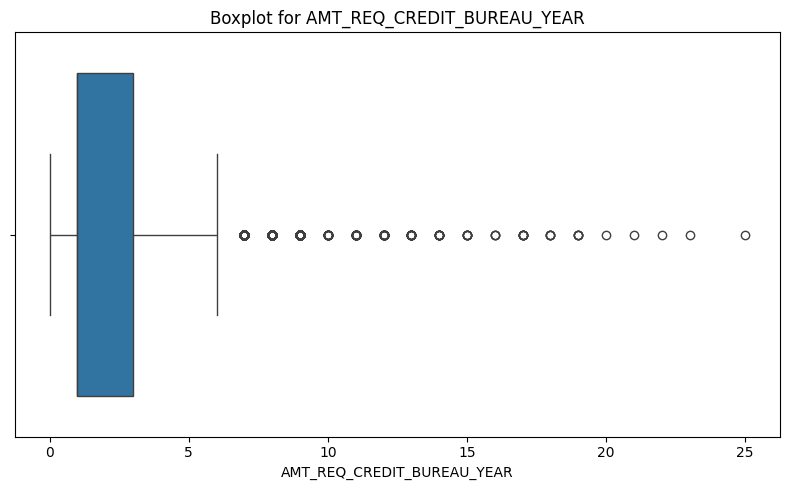

In [ ]:
 #Select numerical columns
numerical_cols = app_data.select_dtypes(include=['number']).columns

# Loop through numerical columns and create boxplots
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=app_data[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [ ]:

outlier_df = app_data.copy()


numerical_cols = outlier_df.select_dtypes(include=['number']).columns


def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df


cleaned_df = remove_outliers(outlier_df, numerical_cols)

print(f"Original dataset size: {outlier_df.shape}")
print(f"Cleaned dataset size: {cleaned_df.shape}")


Original dataset size: (307511, 32)
Cleaned dataset size: (58878, 32)


In [ ]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_REALTY              307511 non-null  object 
 5   AMT_INCOME_TOTAL             307511 non-null  float64
 6   AMT_CREDIT                   307511 non-null  float64
 7   AMT_ANNUITY                  307511 non-null  float64
 8   AMT_GOODS_PRICE              307511 non-null  float64
 9   NAME_TYPE_SUITE              307511 non-null  object 
 10  NAME_INCOME_TYPE             307511 non-null  object 
 11  NAME_HOUSING_TYPE            307511 non-null  object 
 12  REGION_POPULATION_RELATIVE   307511 non-null  float64
 13 

**Load Previous Application Data**

**Data Cleaning**

In [ ]:
prev_app = pd.read_csv('previous_application.csv')

**Check The Size of Data**

In [ ]:
prev_app.shape

(1670214, 37)

**Check The First Five Row of Data**

In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Check the Information about Data**

In [ ]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

**Check the Null Value Present in our Data**

In [ ]:
prev_app.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


**percentage of missing values**

In [ ]:
(prev_app.isnull().sum()/len(prev_app.index))*100

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_DOWN_PAYMENT,53.636480
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000


**Remove the data where more than 50% Null Value**

In [ ]:
prev_app = prev_app.drop(["AMT_DOWN_PAYMENT", "RATE_INTEREST_PRIMARY", "RATE_DOWN_PAYMENT", "RATE_INTEREST_PRIVILEGED"], axis=1)

In [ ]:
prev_app.shape

(1670214, 33)

In [ ]:
(prev_app.isnull().sum()/len(prev_app.index))*100

,0
SK_ID_PREV,0.000000
SK_ID_CURR,0.000000
NAME_CONTRACT_TYPE,0.000000
AMT_ANNUITY,22.286665
AMT_APPLICATION,0.000000
AMT_CREDIT,0.000060
AMT_GOODS_PRICE,23.081773
WEEKDAY_APPR_PROCESS_START,0.000000
HOUR_APPR_PROCESS_START,0.000000
FLAG_LAST_APPL_PER_CONTRACT,0.000000


In [ ]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


**Filling The Null Value**

In [ ]:
prev_app["AMT_ANNUITY"] = prev_app["AMT_ANNUITY"].fillna(prev_app["AMT_ANNUITY"].median(skipna = True))

In [ ]:
prev_app["AMT_GOODS_PRICE"] = prev_app["AMT_GOODS_PRICE"].fillna(prev_app["AMT_GOODS_PRICE"].median(skipna = True))

In [ ]:
prev_app["AMT_CREDIT"] = prev_app["AMT_CREDIT"].fillna(prev_app["AMT_CREDIT"].median(skipna = True))

In [ ]:
prev_app["NAME_TYPE_SUITE"] = prev_app["NAME_TYPE_SUITE"].fillna(prev_app["NAME_TYPE_SUITE"].mode()[0])


In [ ]:
prev_app["CNT_PAYMENT"] = prev_app["CNT_PAYMENT"].fillna(prev_app["CNT_PAYMENT"].median(skipna = True))


In [ ]:
prev_app["CNT_PAYMENT"] = prev_app["CNT_PAYMENT"].fillna(prev_app["CNT_PAYMENT"].median(skipna = True))

In [ ]:
prev_app["PRODUCT_COMBINATION"] = prev_app["PRODUCT_COMBINATION"].fillna(prev_app["PRODUCT_COMBINATION"].mode()[0])

In [ ]:
prev_app["DAYS_FIRST_DRAWING"] = prev_app["DAYS_FIRST_DRAWING"].fillna(prev_app["DAYS_FIRST_DRAWING"].median(skipna = True))

In [ ]:

prev_app["DAYS_FIRST_DUE"] = prev_app["DAYS_FIRST_DUE"].fillna(prev_app["DAYS_FIRST_DUE"].median(skipna = True))

In [ ]:
prev_app["DAYS_LAST_DUE_1ST_VERSION"] = prev_app["DAYS_LAST_DUE_1ST_VERSION"].fillna(prev_app["DAYS_LAST_DUE_1ST_VERSION"].median(skipna = True))

In [ ]:
prev_app["DAYS_LAST_DUE"] = prev_app["DAYS_LAST_DUE"].fillna(prev_app["DAYS_LAST_DUE"].median(skipna = True))

In [ ]:
prev_app["DAYS_TERMINATION"] = prev_app["DAYS_TERMINATION"].fillna(prev_app["DAYS_TERMINATION"].median(skipna = True))

In [ ]:
prev_app["NFLAG_INSURED_ON_APPROVAL"] = prev_app["NFLAG_INSURED_ON_APPROVAL"].fillna(prev_app["NFLAG_INSURED_ON_APPROVAL"].median(skipna = True))

Remove Unnecesaary column which are not required

In [ ]:
prev_app = prev_app.drop(
    columns=['HOUR_APPR_PROCESS_START', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION', 'NAME_YIELD_GROUP', 'CHANNEL_TYPE',
        'CODE_REJECT_REASON', 'NAME_PAYMENT_TYPE',
        'FLAG_LAST_APPL_PER_CONTRACT', 'DAYS_DECISION'],
    axis=1)

In [ ]:
prev_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_PREV                  1670214 non-null  int64  
 1   SK_ID_CURR                  1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE          1670214 non-null  object 
 3   AMT_ANNUITY                 1670214 non-null  float64
 4   AMT_APPLICATION             1670214 non-null  float64
 5   AMT_CREDIT                  1670214 non-null  float64
 6   AMT_GOODS_PRICE             1670214 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY      1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE      1670214 non-null  object 
 10  NAME_CONTRACT_STATUS        1670214 non-null  object 
 11  NAME_TYPE_SUITE             1670214 non-null  object 
 12  NAME_CLIENT_TYPE            1670214 non-null  object 
 1

In [ ]:
prev_app.shape

(1670214, 23)

**Data Analysis**

Target Column (TARGET):

Binary classification: 0 might represent non-defaulters, and 1 could represent defaulters.
Distribution of this column can indicate class imbalance.

<ipython-input-116-fd441a204718>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=app_data, palette='coolwarm')


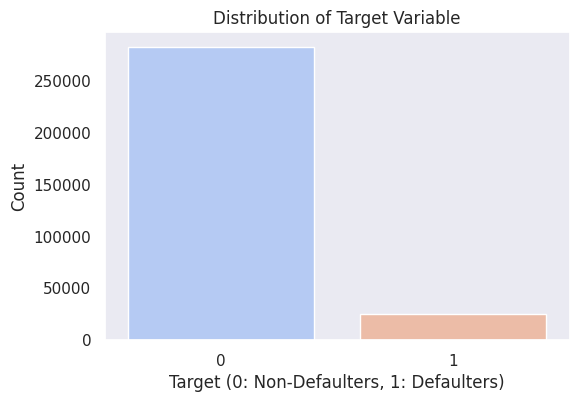

In [ ]:
# Target Column Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='TARGET', data=app_data, palette='coolwarm')
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: Non-Defaulters, 1: Defaulters)')
plt.ylabel('Count')
plt.show()

Key Conclusions:
Target Variable:
If the dataset has a class imbalance in TARGET, oversampling (e.g., SMOTE) or undersampling may be required before building models.

Categorical Columns:

Columns like NAME_CONTRACT_TYPE, CODE_GENDER, and FLAG_OWN_REALTY are categorical. These can provide insights into demographic and behavioral factors.

In [ ]:
# Categorical Variable Distribution
categorical_columns = app_data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=app_data, palette='viridis')
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


Conclsion

Categorical Features:
Variables like CODE_GENDER or NAME_INCOME_TYPE could be used to segment customers and analyze their behavior further.

Gender Distribution: The chart shows how loan defaults are distributed across gender categories (CODE_GENDER). Higher Defaults Among Males: The default rate is higher in males than in females. More males in the dataset appear to have defaulted.

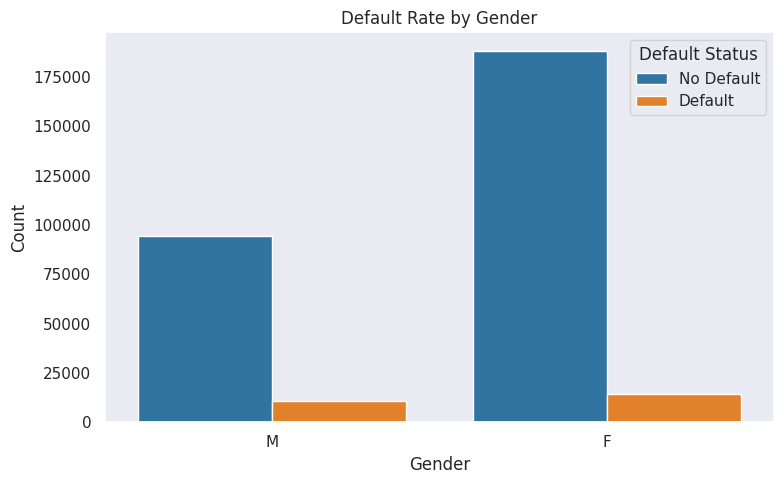

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=app_data, x='CODE_GENDER', hue='TARGET')
plt.title('Default Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

Targeting Strategy: Males exhibit a higher default rate, indicating that they may be a higher-risk group. Financial institutions might need to apply stricter risk assessment or preventive measures when lending to male customers

Insight - Higher Defaults in Pensioners and Commercial Associates: The chart reveals that pensioners and commercial associates show a higher default rate.

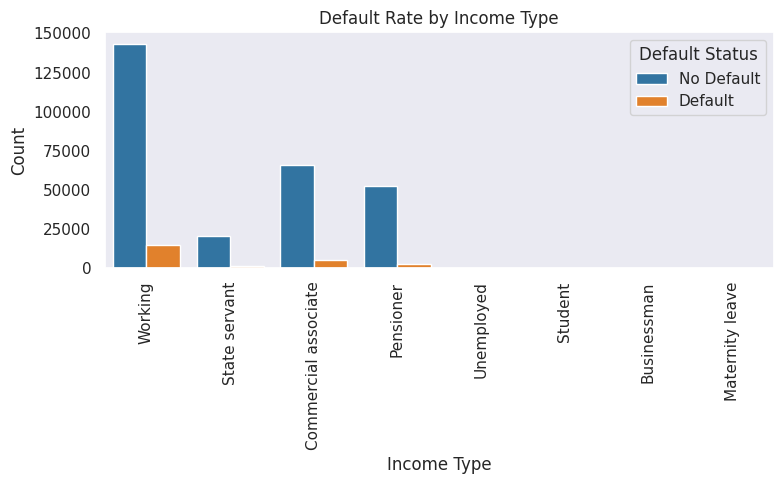

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=app_data, x='NAME_INCOME_TYPE', hue='TARGET')
plt.xticks(rotation=90)
plt.title('Default Rate by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()


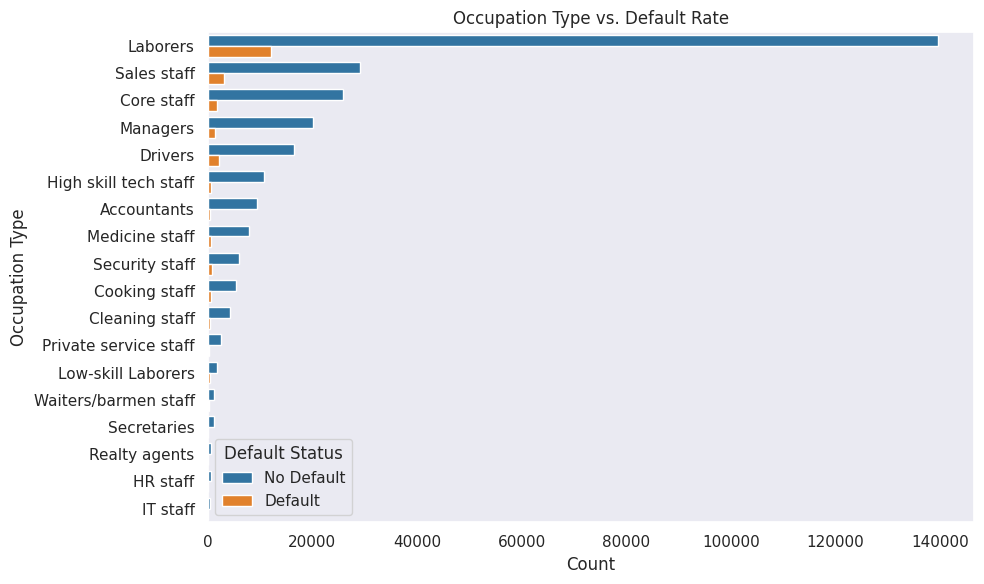

In [ ]:
# Occupation Type vs. Default Rate
plt.figure(figsize=(10, 6))
sns.countplot(data=app_data, y='OCCUPATION_TYPE', hue='TARGET', order=app_data['OCCUPATION_TYPE'].value_counts().index)
plt.title('Occupation Type vs. Default Rate')
plt.xlabel('Count')
plt.ylabel('Occupation Type')
plt.legend(title='Default Status', labels=['No Default', 'Default'])
plt.tight_layout()
plt.show()

  **Analysis for Previous Application Data**

**Categorical Variable Distribution**

This shows the frequency of each category and can help identify any dominant categories or imbalanced data.

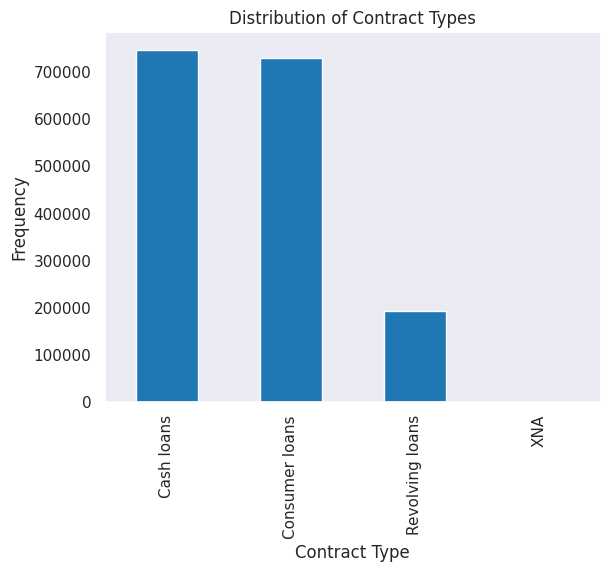

In [ ]:
prev_app['NAME_CONTRACT_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Frequency')
plt.show()


Conclusion: If certain categories (e.g., NAME_CONTRACT_TYPE) are overwhelmingly frequent, it might suggest that this variable has more predictive power or that data imbalance needs to be addressed.
python
Copy code


Boxplots for Numerical Variables

Boxplots reveal the presence of outliers and the spread of the data. It's useful to spot extreme values in the columns that might need cleaning or adjustment.

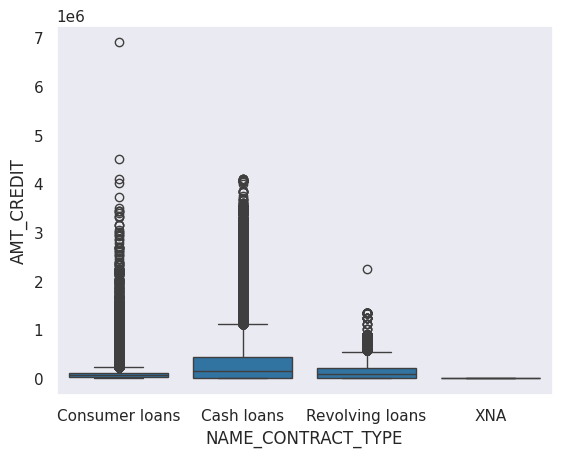

In [ ]:
sns.boxplot(x='NAME_CONTRACT_TYPE', y='AMT_CREDIT', data=prev_app)
plt.show()


Conclusion: If there are significant outliers in AMT_GOODS_PRICE, for example, you might need to decide whether to cap or remove those values

**Countplot for Categorical Variables**
Countplots give a quick view of the frequency of categories in a feature. It's useful for understanding class distributions and detecting imbalances.

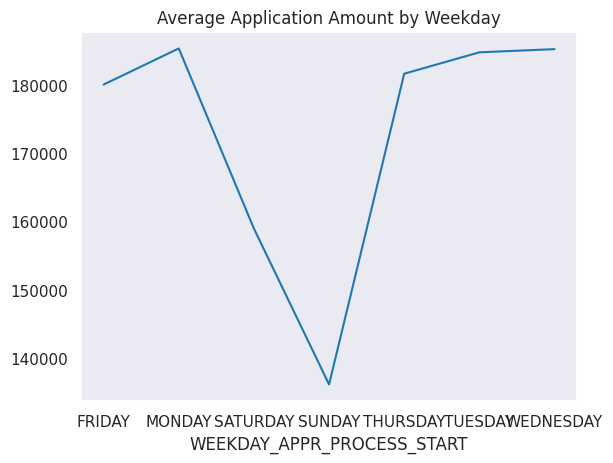

In [ ]:
prev_app.groupby('WEEKDAY_APPR_PROCESS_START')['AMT_APPLICATION'].mean().plot(kind='line')
plt.title('Average Application Amount by Weekday')
plt.show()


Conclusion: If certain categories like NAME_CONTRACT_STATUS have very imbalanced distributions, you may need to adjust your analysis or model accordingly.

**Bar Plot for Days-Related Features**

This helps to understand if there are patterns related to the number of days, which might indicate different customer behaviors or loan characteristics.

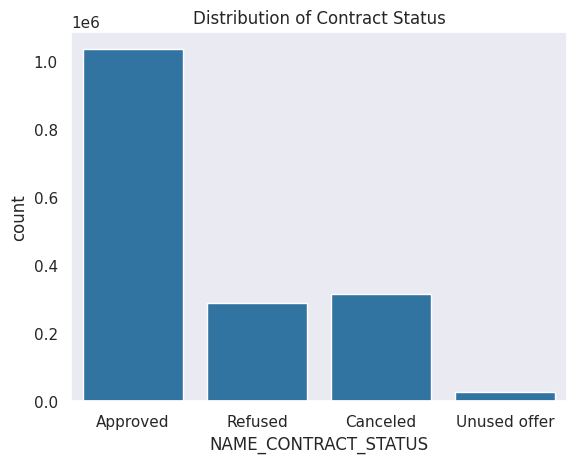

In [ ]:
sns.countplot(x='NAME_CONTRACT_STATUS', data=prev_app)
plt.title('Distribution of Contract Status')
plt.show()


Count Plot: NAME_CONTRACT_STATUS by NAME_CLIENT_TYPE
Purpose: Show the distribution of contract statuses (approved/rejected) across different client types (NAME_CLIENT_TYPE).

Conclusion: If DAYS_FIRST_DRAWING varies significantly across contract types, it may point to important temporal factors in the loan process.

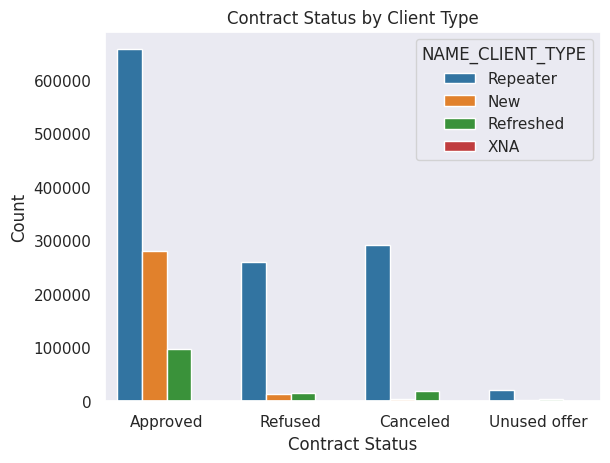

In [ ]:
sns.countplot(x='NAME_CONTRACT_STATUS', hue='NAME_CLIENT_TYPE', data=prev_app)
plt.title('Contract Status by Client Type')
plt.xlabel('Contract Status')
plt.ylabel('Count')
plt.show()

Conclusion :-This will reveal if certain client types are more likely to have approved contracts or rejections. For example, if New Clients are more likely to have rejected contracts, that can inform risk assessment or target strategie

Bar Plot: Average AMT_CREDIT by NAME_GOODS_CATEGORY
Purpose: Show the average credit amount (AMT_CREDIT) across different goods categorie

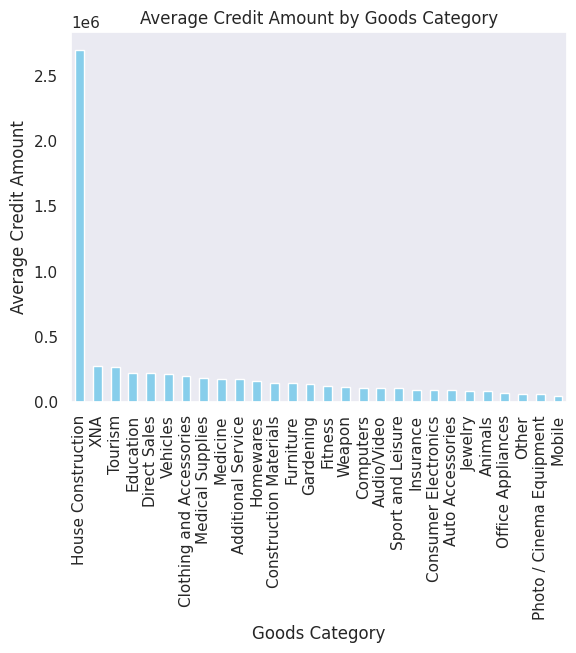

In [ ]:
avg_credit_by_category = prev_app.groupby('NAME_GOODS_CATEGORY')['AMT_CREDIT'].mean().sort_values(ascending=False)
avg_credit_by_category.plot(kind='bar', color='skyblue')
plt.title('Average Credit Amount by Goods Category')
plt.xlabel('Goods Category')
plt.ylabel('Average Credit Amount')
plt.xticks(rotation=90)
plt.show()

Insight & Conclusion:

The bar plot will show which goods categories tend to have larger credit amounts. For example, if Electronics shows a higher average, it could indicate that people take larger loans for electronics.

**Conclusion **:

The analysis of the customer data provides several important insights into loan repayment behavior. It shows that female customers have a lower default rate compared to male customers, with the safest borrowers being those with higher education, homeownership, and stable employment. Occupations like commercial associates, pensioners, and state servants are less likely to default, while unemployed individuals and those on maternity leave are at higher risk. Married customers and those with families tend to repay loans more reliably. Additionally, customers with incomes between 1 to 2 million and those taking cash loans are more common, with the majority of defaults occurring in the 0 to 1 million credit amount range. It is also found that clients with fewer children are generally safer to lend to